In [1]:
# Imports
import pandas as pd
import numpy as np
from scipy.stats import zscore
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import cdist, pdist

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

%matplotlib inline

In [2]:
# reading in final dataframe
df = pd.read_csv('../data/cleaned_data/kahuna.csv')

In [3]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

-------------------------

## KMeans Clustering

In [4]:
X = df.drop(columns=['Entity', 'Year'])
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [5]:
km = KMeans(n_clusters=4, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=4, random_state=42)

In [6]:
km.cluster_centers_;

In [7]:
df['cluster'] = km.labels_
df.head()

,Entity,Year,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,...,Death_5-14,Death_50-69,Death_70+,Death_15-49,Urban%,Child Mortality,Population,GDP,Forest area,cluster
0,Albania,1991,17.613636,4228256,1.2889,4011691.0,9030000.0,0.0,0.02,500000.0,...,5.975427,271.661092,512.126572,60.714220,36.700,3.93,119.225912,3496.580246,786850.0,2
1,Albania,1995,16.789055,2066496,0.6638,4861321.1,7480000.0,43.4,0.01,600000.0,...,4.580403,240.740486,469.406670,49.692924,38.911,3.39,116.342482,4471.871070,779050.0,2
2,Albania,1996,16.588451,1993216,0.6432,4569702.9,7280000.0,43.2,0.01,600000.0,...,4.373679,255.560407,491.357876,52.069689,39.473,3.26,115.621642,4909.228105,777100.0,2
3,Albania,1997,15.081361,1531552,0.4941,4431656.7,6510000.0,45.2,0.01,500000.0,...,4.414006,269.448518,521.197486,57.988035,40.035,3.13,114.900766,4400.577827,775150.0,2
4,Albania,1998,15.965796,1744064,0.5607,4344061.6,6810000.0,49.6,0.01,700000.0,...,4.493629,280.472022,547.315668,64.973478,40.601,2.99,114.179927,4819.387534,773200.0,2


In [8]:
# comparision of numerical representations of clusters means
df.groupby('cluster').mean().T

cluster,0,1,2,3
Year,2.002622e+03,2.001500e+03,2.001552e+03,2.001500e+03
Deaths %,8.761786e+00,3.911636e+00,1.417707e+01,1.983135e+01
CO2 Emissions,1.458546e+08,5.664404e+09,2.557077e+07,3.149207e+09
CO2 Emissions Per Cap,7.634302e+00,1.994650e+01,7.357408e-01,2.463833e+00
Food Emissions,9.376033e+07,1.411459e+09,1.196100e+08,1.432680e+09
Total GHG,2.223324e+08,6.159870e+09,1.471003e+08,3.915459e+09
Consumption of Ozone,1.562110e+03,4.746796e+04,5.126729e+02,3.551738e+04
Shared CO2 Emissions,5.247337e-01,2.097917e+01,9.400000e-02,1.093333e+01
Transport,2.809501e+07,1.637742e+09,6.280479e+06,2.191417e+08
Death_rate_ambient_ozone_pol,1.775393e+00,3.014308e+00,3.256993e+00,1.621379e+01


In [9]:
columns = df.columns.drop(['Entity', 'cluster', 'Year'])

In [10]:
km.cluster_centers_;

In [11]:
df.shape

(2409, 27)

In [12]:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=columns
)
centroids

,Deaths %,CO2 Emissions,CO2 Emissions Per Cap,Food Emissions,Total GHG,Consumption of Ozone,Shared CO2 Emissions,Transport,Death_rate_ambient_ozone_pol,Death_rate_household_air_pol,...,Death_under5,Death_5-14,Death_50-69,Death_70+,Death_15-49,Urban%,Child Mortality,Population,GDP,Forest area
0,8.763674,1.457661e+08,7.629768,9.371892e+07,2.222096e+08,1561.236547,0.524411,2.808024e+07,1.774759,15.142651,...,588.066618,18.777536,4006.583782,5796.508713,1114.645613,69.806035,2.150918,216.513486,22521.525633,3.734389e+07
1,3.911636,5.664404e+09,19.946500,1.411459e+09,6.159870e+09,47467.956667,20.979167,1.637742e+09,3.014308,0.072509,...,964.143942,7.433022,26056.717104,61425.546122,4913.515424,78.874792,0.857917,31.123859,49302.893297,3.051919e+08
2,14.180162,2.558610e+07,0.735640,1.197156e+08,1.472314e+08,512.987914,0.094065,6.280935e+06,3.259911,147.757620,...,2629.650092,62.136629,2984.572559,3527.255371,1016.873133,36.910661,8.658429,116.594387,3706.197757,1.952800e+07
3,19.831352,3.149207e+09,2.463833,1.432680e+09,3.915459e+09,35517.383542,10.933333,2.191417e+08,16.213795,132.159339,...,60912.311895,1765.129307,228012.691542,411923.571069,56154.186658,33.544688,5.998958,249.008456,3911.556322,1.243952e+08


In [13]:
scores = []
for k in range(2, 31):
    cl = KMeans(n_clusters=k)
    cl.fit(X_sc)
    inertia = cl.inertia_
    sil = silhouette_score(X_sc, cl.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']

In [14]:
score_df.head(11)

,k,inertia,silhouette
0,2,38563.314328,0.798139
1,3,32001.744490,0.761287
2,4,25712.994794,0.276625
3,5,22556.376336,0.278933
4,6,19631.993139,0.301169
5,7,16958.828483,0.316305
6,8,14944.602318,0.324841
7,9,12962.792801,0.310387
8,10,11713.396022,0.323114
9,11,10624.890052,0.324430


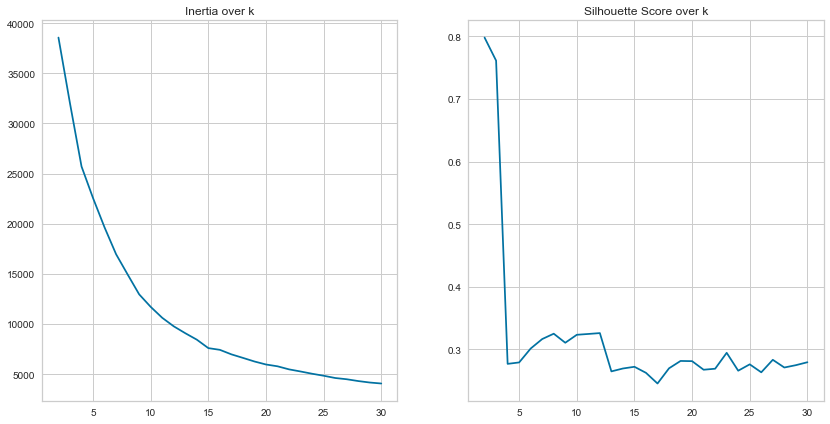

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))
axes[0].plot(score_df.k, score_df.inertia)
axes[0].set_title('Inertia over k')
axes[1].plot(score_df.k, score_df.silhouette);
axes[1].set_title('Silhouette Score over k');

In [16]:
# group is the largest cluster by far
df['cluster'].value_counts()

0    1502
2     835
3      48
1      24
Name: cluster, dtype: int64

In [17]:
km_10 = KMeans(n_clusters=10, random_state=42)
km_10.fit(X_sc)

KMeans(n_clusters=10, random_state=42)

In [18]:
df['clusterx10'] = km_10.labels_

In [19]:
df['clusterx10'].value_counts()

8    1167
3     561
0     398
4     121
6      66
1      24
9      24
2      24
5      14
7      10
Name: clusterx10, dtype: int64

<AxesSubplot:>

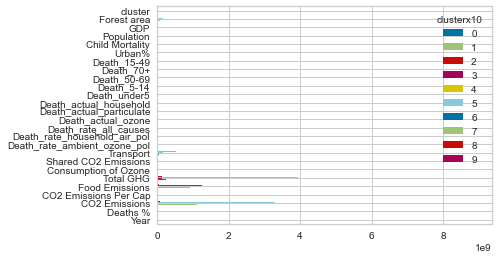

In [20]:
df.groupby(by='clusterx10').mean().T.plot(kind='barh')

In [21]:
df['Entity'].value_counts()

Ecuador      25
Pakistan     25
Togo         25
Egypt        25
Brazil       25
             ..
Lithuania     9
Sweden        5
Finland       5
Austria       5
Sudan         2
Name: Entity, Length: 116, dtype: int64

<Figure size 2880x1440 with 0 Axes>

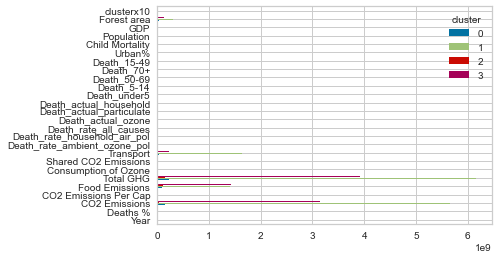

<Figure size 2880x1440 with 0 Axes>

In [22]:
df.groupby('cluster').mean().T.plot(kind='barh')
plt.figure(figsize=(40,20))


In [23]:
lis = [1,2,3,4,4]
lis.reverse()
lis

[4, 4, 3, 2, 1]

In [24]:
rev_columns = list(columns.astype(str))
rev_columns.reverse()

In [25]:
china = df[df['Entity'] == 'China']

Text(0.5, 1.0, 'China: Death % over Time')

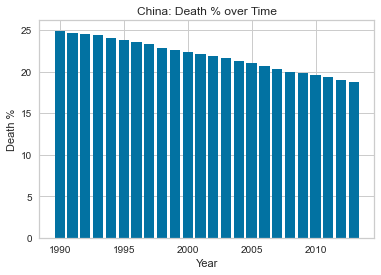

In [26]:
plt.bar(china['Year'], china['Deaths %'])
plt.xlabel('Year')
plt.ylabel('Death %')
plt.title('China: Death % over Time')

Text(0.5, 1.0, 'China: Death % over Time')

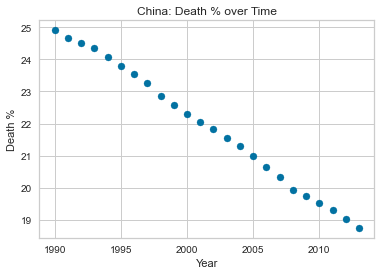

In [27]:
plt.scatter(china['Year'], china['Deaths %'])
plt.xlabel('Year')
plt.ylabel('Death %')
plt.title('China: Death % over Time')

In [28]:
for x, y in zip(columns, rev_columns):
    colors = ["red", "green", "blue"]
    df['color'] = df['cluster'].map(lambda p: colors[p])

    ax = df.plot(    
        kind="scatter", 
        x=x, y=y,
        figsize=(10,8),
        c = df['color']
    )
    centroids.plot(
    kind="scatter", 
    x=x, y=y, 
    marker="*", c=["maroon", "darkgreen", "navy"], s=550,
    ax=ax
    );

IndexError: list index out of range

### 

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
le = LabelEncoder()
df['Entity'] = le.fit_transform(df['Entity'])
scaler = StandardScaler()
subset = df.copy()
subset.color = subset.color.map({'red':1, 'green':2, 'blue':3})
subset_scaled = scaler.fit_transform(subset)
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
k_means_df = subset_scaled_df.copy()

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 30), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

In [ ]:
sil_score = []
cluster_list = range(2, 10)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

**Observations**

- The silhouette coefficient for 3 clusters is the highest.
- We can also see that the score for 3 clusters is close to the average score and the shape of the clusters is very uniform in SilhouetteVisualizer, even though the magnitude may be different.
- So, we will proceed with 3 clusters.

## Hierarchical Clustering

In [ ]:
df.color = df.color.map({'red':1, 'green':2, 'blue':3})

In [ ]:
ss = StandardScaler()
df_sc = ss.fit_transform(df)

model = AgglomerativeClustering(distance_threshold=100, affinity='euclidean',  linkage='average', n_clusters =None)
model.fit(df_sc)
df['labels'] = model.labels_
df_clust = df.groupby(['labels'])

In [ ]:
Z = linkage(df_sc, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(df_sc))

In [ ]:
%%time
plt.figure(figsize=(25, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, truncate_mode ='level' ,leaf_font_size=8. )
plt.tight_layout()